In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("CandK1994_replicate.csv")
data.head()

,Unnamed: 0,sheet,chain,co_owned,state,southj,centralj,northj,pa1,pa2,...,firstin2,special2,meals2,open2r,hrsopen2,psoda2,pfry2,pentree2,nregs2,nregs112
0,1,46,1,0,0,0,0,0,1,0,...,0.08,1.0,2.0,6.5,16.5,1.03,NaN,0.94,4.0,4.0
1,2,49,2,0,0,0,0,0,1,0,...,0.05,0.0,2.0,10.0,13.0,1.01,0.89,2.35,4.0,4.0
2,3,506,2,1,0,0,0,0,1,0,...,0.25,NaN,1.0,11.0,11.0,0.95,0.74,2.33,4.0,3.0
3,4,56,4,1,0,0,0,0,1,0,...,0.15,0.0,2.0,10.0,12.0,0.92,0.79,0.87,2.0,2.0
4,5,61,4,1,0,0,0,0,1,0,...,0.15,0.0,2.0,10.0,12.0,1.01,0.84,0.95,2.0,2.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  410 non-null    int64  
 1   sheet       410 non-null    int64  
 2   chain       410 non-null    int64  
 3   co_owned    410 non-null    int64  
 4   state       410 non-null    int64  
 5   southj      410 non-null    int64  
 6   centralj    410 non-null    int64  
 7   northj      410 non-null    int64  
 8   pa1         410 non-null    int64  
 9   pa2         410 non-null    int64  
 10  shore       410 non-null    int64  
 11  ncalls      410 non-null    int64  
 12  empft       404 non-null    float64
 13  emppt       406 non-null    float64
 14  nmgrs       404 non-null    float64
 15  wage_st     390 non-null    float64
 16  inctime     379 non-null    float64
 17  firstinc    367 non-null    float64
 18  bonus       410 non-null    int64  
 19  pctaff      366 non-null    f

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23980\2407505828.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wage_bin'] = pd.cut(data['wage'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23980\2407505828.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wage_bin'] = pd.cut(data['wage'], bins=bins, labels=labels, include_lowest=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23980\2407505828.py:14: Settin

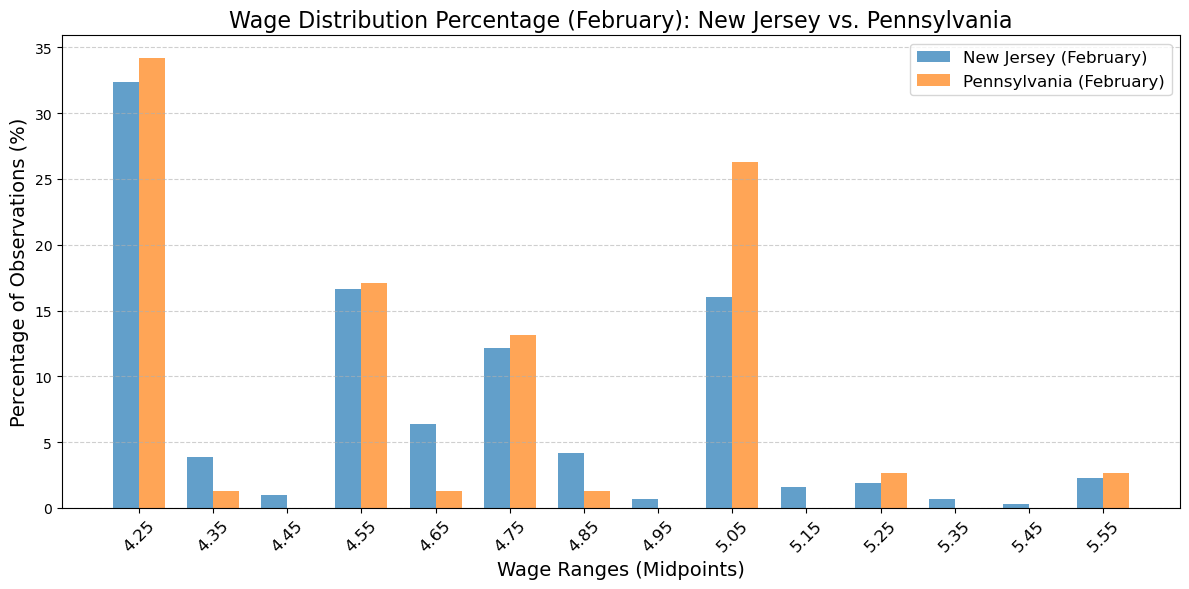

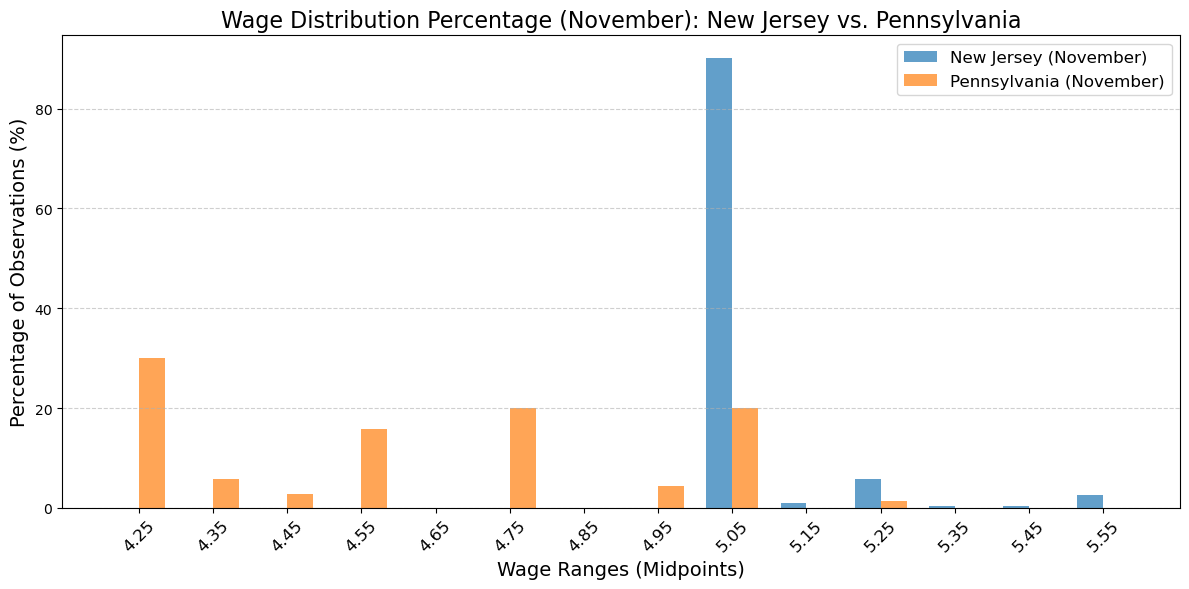

In [14]:
import numpy as np

bins = np.arange(4.2, 5.6 + 0.1, 0.1)
labels = [round(b + 0.05, 2) for b in bins[:-1]]  

february_data = data[['state', 'wage_st']].rename(columns={'wage_st': 'wage'})
february_data['month'] = 'February'
november_data = data[['state', 'wage_st2']].rename(columns={'wage_st2': 'wage'})
november_data['month'] = 'November'

combined_data = pd.concat([february_data, november_data], ignore_index=True)

def calculate_percentage(data, bins, labels, state_name):
    data['wage_bin'] = pd.cut(data['wage'], bins=bins, labels=labels, include_lowest=True)
    counts = data['wage_bin'].value_counts(normalize=True).sort_index() * 100  
    return counts

feb_nj = calculate_percentage(february_data[february_data['state'] == 1], bins, labels, 'New Jersey')
feb_pa = calculate_percentage(february_data[february_data['state'] == 0], bins, labels, 'Pennsylvania')
nov_nj = calculate_percentage(november_data[november_data['state'] == 1], bins, labels, 'New Jersey')
nov_pa = calculate_percentage(november_data[november_data['state'] == 0], bins, labels, 'Pennsylvania')

x = np.arange(len(labels))  
width = 0.35  

plt.figure(figsize=(12, 6))
plt.bar(x - width / 2, feb_nj, width, label='New Jersey (February)', alpha=0.7)
plt.bar(x + width / 2, feb_pa, width, label='Pennsylvania (February)', alpha=0.7)

plt.title('Wage Distribution Percentage (February): New Jersey vs. Pennsylvania', fontsize=16)
plt.xlabel('Wage Ranges (Midpoints)', fontsize=14)
plt.ylabel('Percentage of Observations (%)', fontsize=14)
plt.xticks(x, labels, rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(x - width / 2, nov_nj, width, label='New Jersey (November)', alpha=0.7)
plt.bar(x + width / 2, nov_pa, width, label='Pennsylvania (November)', alpha=0.7)

plt.title('Wage Distribution Percentage (November): New Jersey vs. Pennsylvania', fontsize=16)
plt.xlabel('Wage Ranges (Midpoints)', fontsize=14)
plt.ylabel('Percentage of Observations (%)', fontsize=14)
plt.xticks(x, labels, rotation=45, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
data['Treat'] = (data['state'] == 1).astype(int)  
data['Post'] = (data['empft2'] > 0).astype(int)  

# Pre-Treatment Mean
pre_treatment_mean = {
    'Control (PA)': data[data['Treat'] == 0]['empft'].mean(),
    'Treatment (NJ)': data[data['Treat'] == 1]['empft'].mean()
}

# Post-Treatment Mean
post_treatment_mean = {
    'Control (PA)': data[data['Treat'] == 0]['empft2'].mean(),
    'Treatment (NJ)': data[data['Treat'] == 1]['empft2'].mean()
}

# Difference 
difference = {
    'Control (PA)': post_treatment_mean['Control (PA)'] - pre_treatment_mean['Control (PA)'],
    'Treatment (NJ)': post_treatment_mean['Treatment (NJ)'] - pre_treatment_mean['Treatment (NJ)']
}


results_table = pd.DataFrame({
    'Pre-Treatment Mean (EMPFT)': pre_treatment_mean,
    'Post-Treatment Mean (EMPFT2)': post_treatment_mean,
    'Difference (Post - Pre)': difference
})

In [19]:
pre_treatment_mean = data.groupby('Treat')['empft'].mean()
post_treatment_mean = data.groupby('Treat')['empft2'].mean()

difference = post_treatment_mean - pre_treatment_mean

results_table = pd.DataFrame({
    'Control (PA)': [pre_treatment_mean[0], post_treatment_mean[0], difference[0]],
    'Treatment (NJ)': [pre_treatment_mean[1], post_treatment_mean[1], difference[1]],
    'NJ - PA Difference': [
        pre_treatment_mean[1] - pre_treatment_mean[0],  
        post_treatment_mean[1] - post_treatment_mean[0],  
        difference[1] - difference[0]  
    ]
}, index=['Pre-Treatment Mean (EMPFT)', 'Post-Treatment Mean (EMPFT2)', 'Difference (Post - Pre)'])

In [20]:
results_table

,Control (PA),Treatment (NJ),NJ - PA Difference
Pre-Treatment Mean (EMPFT),10.205128,7.723926,-2.481202
Post-Treatment Mean (EMPFT2),7.564935,8.445483,0.880548
Difference (Post - Pre),-2.640193,0.721556,3.361750


In [22]:
import statsmodels.formula.api as smf

# DID regression
did_model = smf.ols('empft2 - empft ~ Treat + Post + Treat:Post', data=data).fit()

# Extract regression Tau
regression_tau = did_model.params['Treat:Post']

# Manual Difference-in-Differences calculation
pre_treatment_mean = data.groupby('Treat')['empft'].mean()
post_treatment_mean = data.groupby('Treat')['empft2'].mean()
manual_tau = (post_treatment_mean[1] - pre_treatment_mean[1]) - (post_treatment_mean[0] - pre_treatment_mean[0])

# Results comparison
comparison = {
    'Regression Tau': regression_tau,
    'Manual DID Tau': manual_tau
}

In [23]:
comparison

{'Regression Tau': 0.4351034349423117, 'Manual DID Tau': 3.3617496258686552}